<a href="https://colab.research.google.com/github/caplescia/MPM_200_Plescia/blob/main/notebooks/Christen_Plescia_Copy_of_Assignment_5and8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MPM 200: Assignment 4

### Due 29th October 2025 9AM

* For all questions, you must show your work. This will enable us to understand your thought process, give partial credit, and prevent crude cheating.
* Please make sure that you are not simply copying each other's code, but rather striving to understand each other's work and learn from it
* Additionally, please provide the R code at the end of your solution and include R commands along with R outputs. This will help to describe your solutions more clearly.

# Section 0: R

**Q0: install package "beepr" from CRAN and use *beep()* function to make "MARIO" sound.**

In [7]:
install.packages("beepr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘audio’




In [8]:
library(beepr)

In [9]:
?beep

In [10]:
beep(sound = "mario")

Warning message in value[[3L]](cond):
“beep() could not play the sound due to the following error:
Error in play.default(x, rate, ...): no audio drivers are available
”


Make sure you have the following packages installed.
1. Tidyverse
2. dplyr
3. ggplot2
4. sjPlot

In [11]:
install.packages("tidyverse, dply, ggplot2, sjPlot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘tidyverse, dply, ggplot2, sjPlot’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


## Will the hummers survive?

#### As a wildlife veterinarian, you are interested in understanding the trends in hummingbird survival in California. To achieve this, you collaborate with several regional rehabilitation centers and develop a dataset of hummingbird rehabilitation cases, based on records maintained by these centers.


#### The data recorded wasthe  following:

Disposition_binary: Died or Released  
Place: Rehabilitation center  
F_Aid: First aid provided  
Species_e: Hummingbird species: ANHU == Anna's Hummingbirds, NonSselasphorus: non-orange hummingbirds that are not identified till species level, Selasphorus: Hummingbirds that are from Selasphorus genus but not identified until species level, BCHU: Black-chinned hummingbirds  
Sex_e:  
Age_e:  
Brought_in_after: Number of days it was with the rescuer before it came to a  rehabilitation center  
season: season when it was admitted  
r: reason for admission  
Green_Orange: species classification: Green or Orange bird  
ID: unique ID given to the  individual bird


### Your aim is to identify factors that affect the survival or successful release of hummingbirds once they are admitted to the rehabilitation center. You are expected to do the following:
1. Tabulate and plot the distribution of your outcome variable
2. Identify covariates that you think (based on your general understanding) and explore individual covariates
3. Plot/tabulate individual covariates with your outcome
4. Run univariate generalized linear models
5. Run backward elimination to find the best-fitting model
6. Run forward addition to finding the best fitting model

# Section 1
### Reading the data
Here, you will read the **Hummingbird_data.csv** file dataset and create a random sample of it. You will use this random sample of the dataset to complete the rest of the exercise.


**Q1. read the Hummingbird_data.csv file in R**   
2 points

In [12]:
getwd()

[1] "/content"

In [125]:
#read the csv file and
Hummingbird_data  = read.csv("/content/Hummingbird_data.csv")

In [126]:
colnames(Hummingbird_data)

[1] "Admitted"           "Disposition_binary" "Place"             
 [4] "F_Aid"              "Species_e"          "Sex_e"             
 [7] "Age_e"              "Brought_in_after"   "season"            
[10] "r"                  "Green_Orange"       "ID"

**Q2. How many rows and columns are in the datafame**  
1 point

In [127]:
nrow(Hummingbird_data)

[1] 6908

In [128]:
ncol(Hummingbird_data)

[1] 12

Answer Q2: There are 6908 rows and 12 columns in this dataset.


### Checking the Structure of Each Column and Identifying Data Types
* Use the `str()` function to view the structure of the dataframe.  
*
Use the` sapply(`) function with class() to identify the data types of each column
*
Discuss any observations or potential issues with the data types.

In [129]:
str(Hummingbird_data)


'data.frame':	6908 obs. of  12 variables:
 $ Admitted          : chr  "1/2/1991" "1/2/1991" "1/4/1991" "1/5/1991" ...
 $ Disposition_binary: chr  "Died" "Released" "Died" "Died" ...
 $ Place             : chr  "Lindsey" "Lindsey" "Lindsey" "Lindsey" ...
 $ F_Aid             : chr  "No" "Yes" "No" "No" ...
 $ Species_e         : chr  "ANHU" "ANHU" "ANHU" "ANHU" ...
 $ Sex_e             : chr  "Female-like " "Female-like " "Female-like " "Female-like " ...
 $ Age_e             : chr  "adult-like" "adult-like" "adult-like" "adult-like" ...
 $ Brought_in_after  : int  1 0 0 4 0 0 0 0 0 0 ...
 $ season            : chr  "Winter" "Winter" "Winter" "Winter" ...
 $ r                 : chr  "found on the ground" "unknown" "suspect torpor-like state" "unknown" ...
 $ Green_Orange      : chr  "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." ...
 $ ID                : chr  "1_ANHU" "2_ANHU" "3_ANHU" "4_ANHU" ...


In [18]:
?sapply

In [95]:
# Identify data types of each column
data_types = sapply(Hummingbird_data, class)
print (data_types)

          Admitted Disposition_binary              Place              F_Aid 
            "Date"        "character"        "character"        "character" 
         Species_e              Sex_e              Age_e   Brought_in_after 
       "character"        "character"        "character"          "integer" 
            season                  r       Green_Orange                 ID 
       "character"        "character"        "character"        "character" 


In [96]:
Hummingbird_data$Brought_in_after <-as.integer(Hummingbird_data$Brought_in_after)

In [97]:
str(Hummingbird_data)

'data.frame':	6908 obs. of  12 variables:
 $ Admitted          : Date, format: "1-02-19" "1-02-19" ...
 $ Disposition_binary: chr  "Died" "Released" "Died" "Died" ...
 $ Place             : chr  "Lindsey" "Lindsey" "Lindsey" "Lindsey" ...
 $ F_Aid             : chr  "No" "Yes" "No" "No" ...
 $ Species_e         : chr  "ANHU" "ANHU" "ANHU" "ANHU" ...
 $ Sex_e             : chr  "Female-like " "Female-like " "Female-like " "Female-like " ...
 $ Age_e             : chr  "adult-like" "adult-like" "adult-like" "adult-like" ...
 $ Brought_in_after  : int  1 0 0 4 0 0 0 0 0 0 ...
 $ season            : chr  "Winter" "Winter" "Winter" "Winter" ...
 $ r                 : chr  "found on the ground" "unknown" "suspect torpor-like state" "unknown" ...
 $ Green_Orange      : chr  "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." ...
 $ ID                : chr  "1_ANHU" "2_ANHU" "3_ANHU" "4_ANHU" ...


**ANSWER on data types:  Instead of using character for Admitted, we should change it to date so that we are aware that it is a reference to time.**

Next step is to create a random subset of the given data.   
Use the given code to create the subset data.

In [98]:
library(dplyr)
model_data = sample_n(Hummingbird_data, 5000)

**Use *model_data* dataframe to answer remainder questions of the assingment.**

**Q3: How many rows and columns are present in your data frame currently?  
1 Point**

In [24]:
str(model_data)

'data.frame':	5000 obs. of  12 variables:
 $ Admitted          : Date, format: "11-10-20" "5-01-19" ...
 $ Disposition_binary: chr  "Died" "Died" "Died" "Died" ...
 $ Place             : chr  "Lindsey" "Lindsey" "malibu" "Lindsey" ...
 $ F_Aid             : chr  "No" "No" "Yes" "No" ...
 $ Species_e         : chr  "ANHU" "ANHU" "Selasphorus" "ANHU" ...
 $ Sex_e             : chr  "Male" "Female-like " "Female-like " "Male" ...
 $ Age_e             : chr  "adult-like" "adult-like" "adult-like" "adult-like" ...
 $ Brought_in_after  : int  0 0 0 0 0 0 0 1 0 0 ...
 $ season            : chr  "Fall" "Spring" "Spring" "Spring" ...
 $ r                 : chr  "found inside" "found on the ground" "found on the ground" "found on the ground" ...
 $ Green_Orange      : chr  "Non-selasphorus spp." "Non-selasphorus spp." "Selasphorus spp." "Non-selasphorus spp." ...
 $ ID                : chr  "4825_ANHU" "1041_ANHU" "6388_ALHU" "5523_ANHU" ...


In [100]:
nrow (model_data)

[1] 5000

In [101]:
ncol(model_data)

[1] 12

There are currently 5000 rows and 12 columns in the data frame.

**Q4: How many columns are categorical variables, and how many are continuous variables in the dataset?  
2 Points**

In [102]:
# Identify each column's data type
data_types <- sapply(model_data, class)

# Define which ones are categorical and which are continuous
categorical_vars <- names(data_types[data_types %in% c("Date", "factor", "character")])
continuous_vars  <- names(data_types[data_types %in% c("numeric", "integer")])

# View results
categorical_vars
continuous_vars

[1] "Admitted"           "Disposition_binary" "Place"             
 [4] "F_Aid"              "Species_e"          "Sex_e"             
 [7] "Age_e"              "season"             "r"                 
[10] "Green_Orange"       "ID"

[1] "Brought_in_after"

In [29]:
print (categorical_vars)


 [1] "Admitted"           "Disposition_binary" "Place"             
 [4] "F_Aid"              "Species_e"          "Sex_e"             
 [7] "Age_e"              "season"             "r"                 
[10] "Green_Orange"       "ID"                


In [30]:
print (continuous_vars)

[1] "Brought_in_after"


ANSWER:  There are 11 categorical variables and 1 continuous variable in the dataset.  

**Q5: Submit your model_data file along with your submission.  
Save it as "Hummingbird_data_YOURNAME.csv" and submit it    
2 Points**

In [103]:
write.csv(model_data, "/content/Hummingbird_data_ChristenPlescia.csv")

In [104]:
print(model_data)

     Admitted Disposition_binary         Place F_Aid       Species_e
1        <NA>               Died        malibu   Yes     Selasphorus
2        <NA>               Died       Lindsey    No            ANHU
3     3-01-20               Died       Lindsey    No            ANHU
4        <NA>               Died        malibu    No            ANHU
5     4-09-20           Released       Lindsey    No            ANHU
6        <NA>               Died       Lindsey   Yes Non-selasphorus
7     3-03-19               Died       Lindsey    No            ANHU
8     1-06-20           Released       Lindsey    No            ANHU
9        <NA>               Died       Lindsey    No            ANHU
10       <NA>               Died       Lindsey    No            ANHU
11       <NA>           Released       Lindsey    No     Selasphorus
12       <NA>           Released       Lindsey   Yes Non-selasphorus
13   11-10-20               Died       Lindsey    No            ANHU
14    4-11-20               Died  

In [105]:
getwd()

[1] "/content"

In [106]:
library(ggplot2)

# Section 2
## Rehabilitation Center and number of hummingbirds
Lets see how we can explore how many birds were admitted to each rehabilitation center (represented by column Place).  
We will use functions from` dply`r to generate summary tables and plot them using` GGplot`2

In [107]:
model_data%>%
group_by(Place)%>%
summarise(count = n_distinct(ID))

#here we are taking the data frame that contains our data set (model_data) and separating it into columns of place and ID
#the %>% is the pipeline which takes the results from step 1 (Place) and connects it as input to the next step
#so we are saying:  “Take model_data, then group it by Place, then summarize it by counting unique IDs.”

Place,count
<chr>,<int>
Lindsey,4157
Santa Barbara,74
malibu,769


In [108]:
rehab = model_data  %>%
group_by(Place)%>%
summarise(count = n_distinct(ID))
#here we are taking the table made from above and renaming it rehab
#we are grouping the data by place
#summarise is counting how many different unique ID's are in that group
#then it is renaming those as count

In [37]:
My_plot = ggplot(rehab, aes(x = Place, y = count)) +
geom_bar(stat="identity", color = 'purple', fill = 'purple')+
xlab('Rehabilitation center')+ ylab('number of hummingbirds')+
labs(title = "Number of rescued hummingbirds")

#My_plot is giving a name to the plot
#ggplot is saying to plot the rehab data frame
#stat is saying to use the exact numbers in identity
#color is telling what color the bars in the chart will be including the filled bars
#the geom_bar is saying to create a bar plot
#xlab and ylab are giving the axis labels
#labs is giving the title to the plot

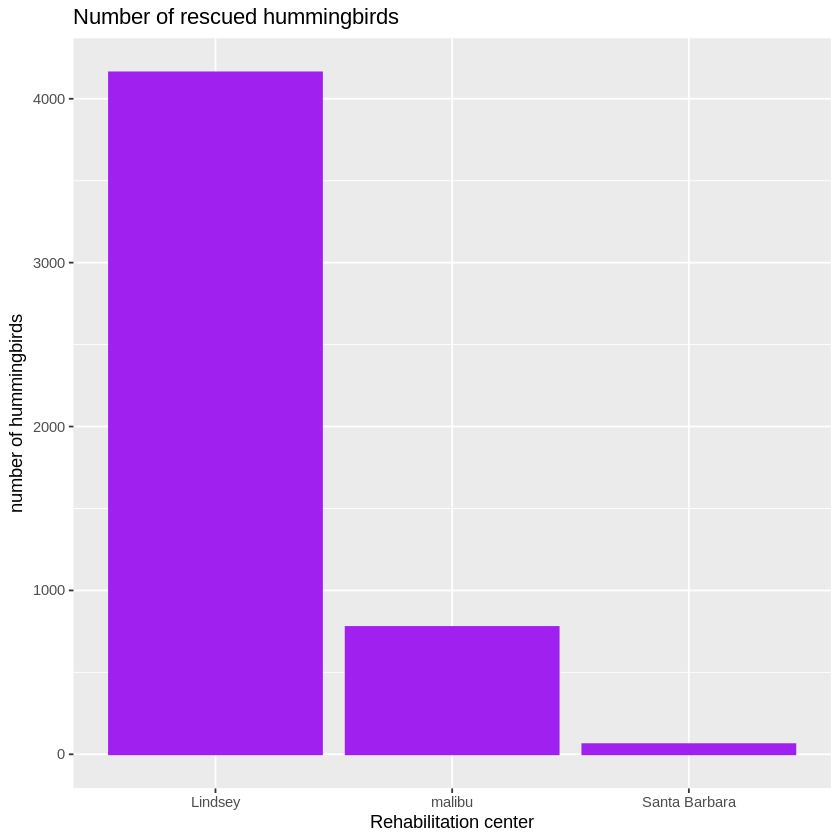

In [109]:
My_plot
#we are telling R to display the plot

**Q6: Please save this plot to a PDF file and submit it along with your assignment. Ensure that the size of the plot is 4 inches wide and 3 inches tall.  
Point: 2**  

In [110]:
pdf("My_plot.pdf", width = 4, height = 3)
print(My_plot)
dev.off()
#here we use pdf to open a pdf device with the designated width and height dimensions
#then we print the plot to the pdf
#then we close to pdf device to save the file


agg_record_1690215027 
                    2

In [111]:
getwd()
#here we are asking for out working directory which is content

[1] "/content"

In [112]:
ggsave("/content/My_plot.pdf", width = 4, height = 3)
#ggsave saves the last plot that was displayed
#content is the path it is going to and My_plot is the file name
#width and height set the dimensions of the saved plot in inches


**Q7: Please explain the code above in words, including what each line of R code is doing, starting from the code that creates the "Rehab" object until the plot.  
Points: 2**  

ANSWER:  explanations are added with the code with # in green

# Section 3

## Key variables that affect the survival of hummingbirds  

#### Do the following steps
1. List 5 covariates from data columns that you think might affect the survival.   
2. For each variable, create a table showing the number of birds that survived and died for each subcategory for the covariate.  
3. To do that, create a table first with COVARIATE, Disposition_binary, and unique IDs
4. Then use that data frame to generate bar plots and use  `facet_grid` function in `GGPlot`

**Q8: What is your observation based on those tables and plots? Do you think all those are associated with the final disposition of hummingbirds? Any suggestions for statistically testing them?  
Points: 5**

ANSWER:  see below the bar chart plots


In [113]:
df = model_data  %>%
group_by(F_Aid, Age_e, season, Species_e, Sex_e)%>%
summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'F_Aid', 'Age_e', 'season', 'Species_e'.
You can override using the `.groups` argument.


In [114]:
df

F_Aid,Age_e,season,Species_e,Sex_e,count
<chr>,<chr>,<chr>,<chr>,<chr>,<int>
No,Nestling,Fall,Non-selasphorus,unknown,4
No,Nestling,Spring,Non-selasphorus,unknown,344
No,Nestling,Spring,Selasphorus,unknown,77
No,Nestling,Summer,Non-selasphorus,unknown,207
No,Nestling,Summer,Selasphorus,unknown,44
No,Nestling,Winter,Non-selasphorus,unknown,57
No,Nestling,Winter,Selasphorus,unknown,7
No,adult-like,Fall,ANHU,Female-like,208
No,adult-like,Fall,ANHU,Male,55


In [115]:
# Count number of survived birds by F_Aid
survival_table_F_Aid <- model_data %>%
  select(F_Aid, Disposition_binary, ID) %>%
  group_by(F_Aid, Disposition_binary) %>%
  summarise(unique_birds = n_distinct(ID),
            .groups = "drop")

survival_table_F_Aid


F_Aid,Disposition_binary,unique_birds
<chr>,<chr>,<int>
No,Died,2079
No,Released,1183
Yes,Died,1127
Yes,Released,611


In [45]:
# Count number of survived birds by Age
survival_table_Age <- model_data %>%
  select(Age_e, Disposition_binary, ID) %>%
  group_by(Age_e, Disposition_binary) %>%
  summarise(unique_birds = n_distinct(ID),
            .groups = "drop")

survival_table_Age



Age_e,Disposition_binary,unique_birds
<chr>,<chr>,<int>
Nestling,Died,429
Nestling,Released,789
adult-like,Died,2765
adult-like,Released,1017


In [116]:
# Count number of survived birds by Species
survival_table_Species <- model_data %>%
  select(Species_e, Disposition_binary, ID) %>%
  group_by(Species_e, Disposition_binary) %>%
  summarise(unique_birds = n_distinct(ID),
            .groups = "drop")

survival_table_Species



Species_e,Disposition_binary,unique_birds
<chr>,<chr>,<int>
ANHU,Died,2309
ANHU,Released,852
BCHU,Died,19
BCHU,Released,13
Non-selasphorus,Died,344
Non-selasphorus,Released,626
Selasphorus,Died,534
Selasphorus,Released,303


In [47]:
# Count number of survived birds by season
survival_table_Season <- model_data %>%
  select(season, Disposition_binary, ID) %>%
  group_by(season, Disposition_binary) %>%
  summarise(unique_birds = n_distinct(ID),
            .groups = "drop")

survival_table_Season


season,Disposition_binary,unique_birds
<chr>,<chr>,<int>
Fall,Died,380
Fall,Released,63
Spring,Died,1319
Spring,Released,962
Summer,Died,936
Summer,Released,586
Winter,Died,559
Winter,Released,195


In [48]:
# Count number of survived birds by Sex
survival_table_Sex <- model_data %>%
  select(Sex_e, Disposition_binary, ID) %>%
  group_by(Sex_e, Disposition_binary) %>%
  summarise(unique_birds = n_distinct(ID),
            .groups = "drop")

survival_table_Sex


Sex_e,Disposition_binary,unique_birds
<chr>,<chr>,<int>
Female-like,Died,2312
Female-like,Released,898
Male,Died,448
Male,Released,119
unknown,Died,434
unknown,Released,789


In [117]:
library(dplyr)

# List of covariates
covariates <- c("F_Aid", "Age_e", "Species_e", "season", "Sex_e")

# Create summary table for each covariate
summary_tables <- lapply(covariates, function(var) {
  model_data %>%
    select(all_of(var), Disposition_binary, ID) %>%
    group_by(across(all_of(var)), Disposition_binary) %>%
    summarise(unique_birds = n_distinct(ID), .groups = "drop") %>%
    mutate(covariate = var)   # Add a column to track which covariate
})

# Combine into one data frame
summary_df <- bind_rows(summary_tables)


In [118]:
print (summary_tables)

[[1]]
# A tibble: 4 × 4
  F_Aid Disposition_binary unique_birds covariate
  <chr> <chr>                     <int> <chr>    
1 No    Died                       2079 F_Aid    
2 No    Released                   1183 F_Aid    
3 Yes   Died                       1127 F_Aid    
4 Yes   Released                    611 F_Aid    

[[2]]
# A tibble: 4 × 4
  Age_e      Disposition_binary unique_birds covariate
  <chr>      <chr>                     <int> <chr>    
1 Nestling   Died                        421 Age_e    
2 Nestling   Released                    760 Age_e    
3 adult-like Died                       2785 Age_e    
4 adult-like Released                   1034 Age_e    

[[3]]
# A tibble: 8 × 4
  Species_e       Disposition_binary unique_birds covariate
  <chr>           <chr>                     <int> <chr>    
1 ANHU            Died                       2309 Species_e
2 ANHU            Released                    852 Species_e
3 BCHU            Died                         19 Specie

In [119]:
library(ggplot2)


In [120]:
library(dplyr)

covariates <- c("F_Aid", "Age_e", "Species_e", "season", "Sex_e")
summary_list <- lapply(covariates, function(var) {
  model_data %>%
    group_by(!!sym(var), Disposition_binary) %>%
    summarise(count = n_distinct(ID), .groups = "drop") %>%
    mutate(
      covariate = var,
      category = as.character(!!sym(var))  # convert all to character
    )
})

summary_df <- bind_rows(summary_list)



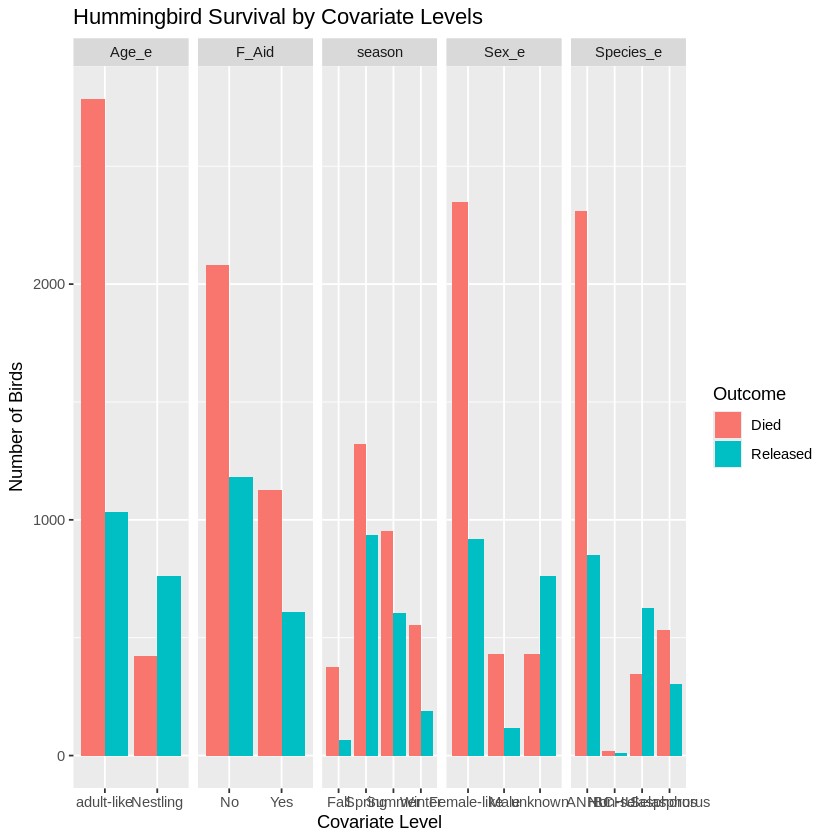

In [121]:
library(ggplot2)

ggplot(summary_df, aes(x = category, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +   # side-by-side bars for survival outcome
  facet_grid(~ covariate, scales = "free_x") +        # separate plot per covariate
  labs(
    x = "Covariate Level",
    y = "Number of Birds",
    fill = "Outcome",
    title = "Hummingbird Survival by Covariate Levels"
  )

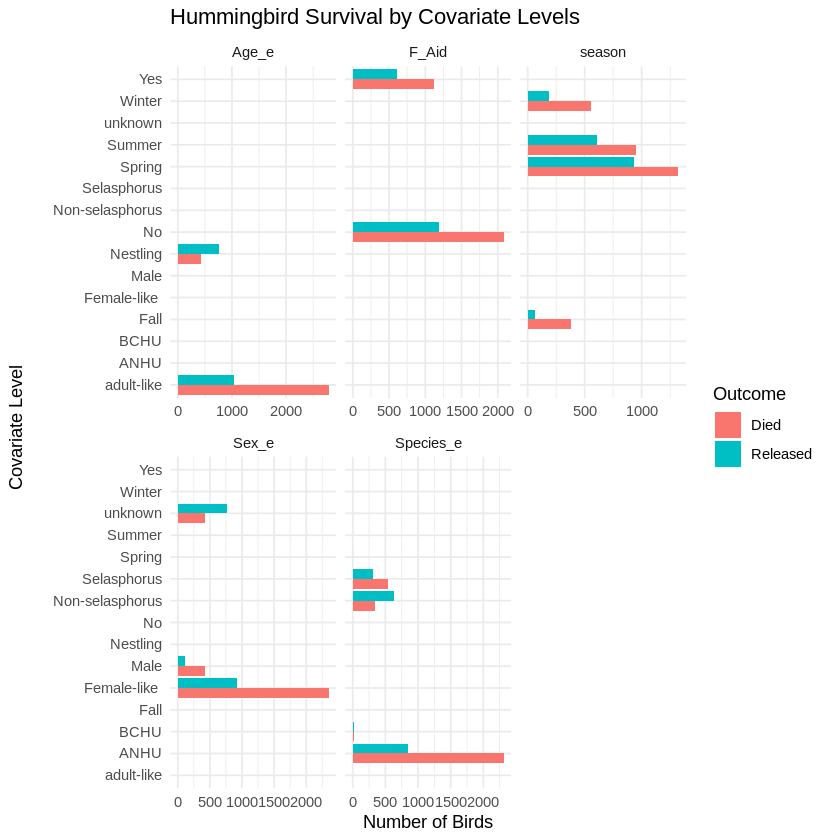

In [122]:
library(ggplot2)

ggplot(summary_df, aes(x = category, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +   # side-by-side bars for survival outcome
  facet_wrap(~ covariate, scales = "free_x") +        # separate plot per covariate
  labs(
    x = "Covariate Level",
    y = "Number of Birds",
    fill = "Outcome",
    title = "Hummingbird Survival by Covariate Levels"
  ) +
  coord_flip() +  # horizontal bars
  theme_minimal()


ANSWER to Q8:  Based on the tables and the plots:  
Based on the Tables and Plots:  it appears that far more birds did not receive aid than did.  Adult like were far more likely to be admitted than nestlings making it appear that Age is linked to survival.  The ANHU species was far more likely to be admitted than any other species and therefore does make it appear that species coorelates to survival. The seasons saw far more admit in spring and summer which would likely coorelate to when the birds are most active so season also seems to be a predictor of survival.  Lastly far more females were admitted than males (although the level of unknown sex may be skewing this data) making it appear that female is a risk factor for survival.  In short:  aid did not appear to be highly associated with final disposition, but age, species, season and sex all did seem to be associated with final disposition.  

More statistical testing to assess admit rates of each covariate and each individual covariate subset would make for more accurate assessment of survival.   For example:  Individual number survivals make it seem like more females died vs males but if you look at the average rate it may say otherwise. Likewise:  it appears that far more ANHU species died but if you look at each species based on their likelihood of admit then the rates of survival may appear quite differently.


## Calculating Proportions

#### Q10: Calculate the proportion of hummingbirds that were released versus those that died for each rehabilitation center.
* Use the `model_data` dataframe to calculate these proportions.
*
Create a table showing the proportions for each rehabilitation center (denoted by column `Place`)   .*
Plot a bar chart to visualize these proportions.

In [123]:
df = model_data

In [124]:
str (model_data)

'data.frame':	5000 obs. of  12 variables:
 $ Admitted          : Date, format: NA NA ...
 $ Disposition_binary: chr  "Died" "Died" "Died" "Died" ...
 $ Place             : chr  "malibu" "Lindsey" "Lindsey" "malibu" ...
 $ F_Aid             : chr  "Yes" "No" "No" "No" ...
 $ Species_e         : chr  "Selasphorus" "ANHU" "ANHU" "ANHU" ...
 $ Sex_e             : chr  "unknown" "Female-like " "Female-like " "Female-like " ...
 $ Age_e             : chr  "Nestling" "adult-like" "adult-like" "adult-like" ...
 $ Brought_in_after  : int  1 0 0 0 0 1 0 0 0 0 ...
 $ season            : chr  "Summer" "Spring" "Spring" "Spring" ...
 $ r                 : chr  "caught by domestic animal" "found on the ground" "found on the ground" "found on the ground" ...
 $ Green_Orange      : chr  "Selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." ...
 $ ID                : chr  "6766_ALHU" "1999_ANHU" "3016_ANHU" "6186_ANHU" ...


In [57]:
# Calculate proportions
proportions = model_data %>%
  group_by(Place, Disposition_binary) %>%
  summarise(count = n_distinct(ID), .groups = "drop") %>%
  group_by(Place) %>%
  mutate(proportion = count / sum(count))



In [58]:
proportions

Place,Disposition_binary,count,proportion
<chr>,<chr>,<int>,<dbl>
Lindsey,Died,2676,0.6431146
Lindsey,Released,1485,0.3568854
Santa Barbara,Died,38,0.6129032
Santa Barbara,Released,24,0.3870968
malibu,Died,480,0.6177606
malibu,Released,297,0.3822394


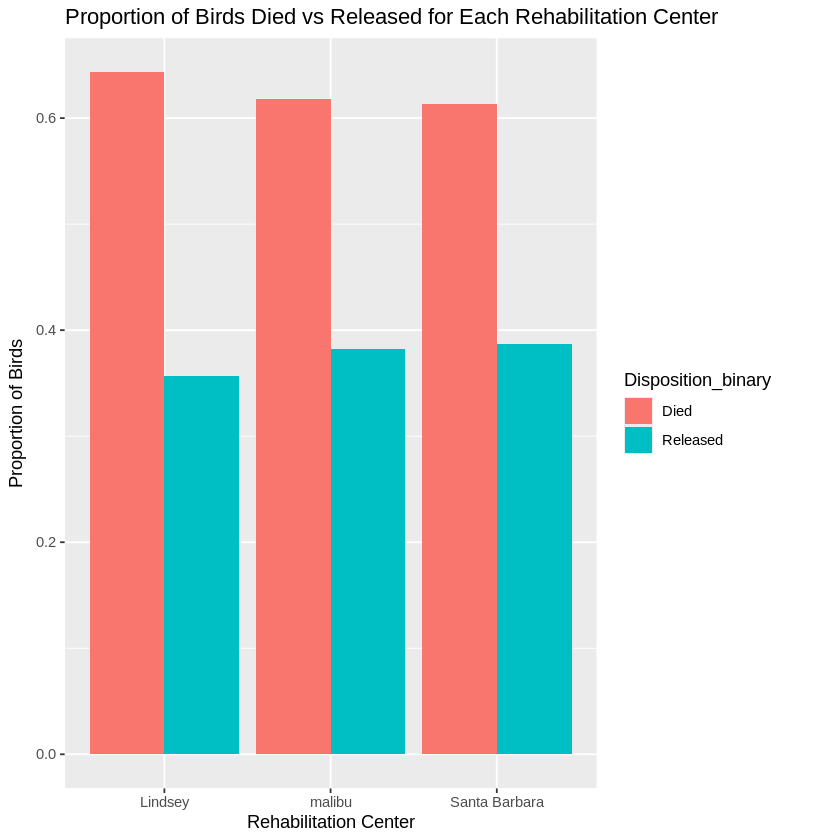

In [59]:
# Plot the proportions
ggplot(proportions, aes(x = Place , y = proportion, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Rehabilitation Center") +
  ylab("Proportion of Birds") +
  labs(title = "Proportion of Birds Died vs Released for Each Rehabilitation Center")

Answer to Q10:  For Lindsay Rehab Facility: 0.652 hummingbirds died and 0.355 were release.  
For Malibu Rehab Facility:  0.618 hummingbirds died and 0.382 were released.
For Santa Barbara Rehab Facility:  0.574 hummingbirds died and 0.426 were released.

### Merging Species into Groups/Families  
#### Q11: Merge the Species_e column into broader categories (e.g., Anna's Hummingbirds, Selasphorus genus, Non-selasphorus, Black-chinned Hummingbirds).
* Anna's Hummingbird, Black-chinned Hummingbird and "non-selasphorous' hummingbirds need to be classified as Non-selasphorus
* All Selasphorus species should be classified as `Selasphorus`
* Create a new column `Species_group` that categorizes the species into these broader groups.
* Tabulate and plot the distribution of hummingbirds by these new species groups.
* Analyze how the survival rates differ across these species groups.

In [60]:
## Hint: think about the logic. How would you quickly classify these species into multiple groups using ifelse statement?

model_data$Species_group <- ifelse(
  grepl("Selasphorus", model_data$Species_e, ignore.case = TRUE),  # matches any Selasphorus species
  "Selasphorus",    # assign Selasphorus if TRUE
  "Non-selasphorus" # assign Non-selasphorus otherwise
)




[1] "Survival Rates by Species Group"

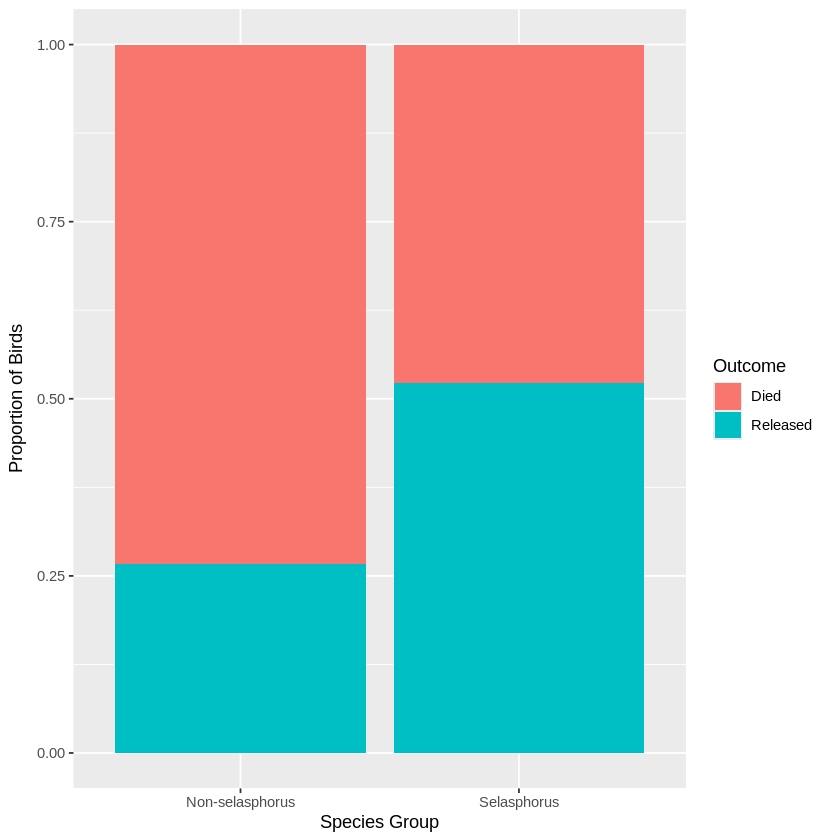

In [61]:
# Tabulate and plot the distribution
species_distribution = model_data %>%
  group_by(Species_group, Disposition_binary) %>%
  summarise(count = n_distinct(ID), .groups = "drop")


ggplot(species_distribution, aes(x = Species_group, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "fill") +
  xlab("Species Group") +
  ylab("Proportion of Birds") +
  labs (fill = "Outcome")
      (title = "Survival Rates by Species Group" )

The survival rate for the Selasphorus species is better than the survival rate for the Non-selasphorus species. Approx 50% of the Selasphorus species survive vs just of 25% of the Non-selasphorus species surviving.

### Q12 Analyze the Trend of Hummingbird Admissions Over Time
* Convert the `Admitted` column to a date format.
*
Summarize the trend of hummingbird admissions over time
*
Plot the trend using `ggplot2`.

In [62]:
model_data$Admitted_date = as.Date(model_data$Admitted, format = "%m/%d/%Y")

In [63]:
class(model_data$Admitted_date)
head(model_data$Admitted_date)


[1] "Date"

[1] "11-10-20" "5-01-19"  "4-12-20"  "3-12-20"  "10-11-20" NA

Q12a Please explain the argument `format` in code above

Answer Q12a:  The argument format is telling R how the text in the column is structured.  Now we know it is a date.

The next step is to summarize the number of birds seen in each month and similarly in each year.

In [64]:
admissions_by_month = model_data %>%
  mutate(Admitted_month = format(Admitted_date, "%Y-%m")) %>%
  group_by(Admitted_month) %>%
  summarise(count = n())

admissions_by_year = model_data %>%
  mutate(Admitted_year = format(Admitted_date, "%Y")) %>%
  group_by(Admitted_year) %>%
  summarise(count = n())

Finally, we can use `ggplot` to plot these timelines.

In [65]:
# Plot admissions by month
p_month = ggplot(admissions_by_month, aes(x = Admitted_month, y = count)) +
  geom_bar(stat = "identity", fill = "purple") +
  xlab("Month Admitted") +
  ylab("Number of Admissions") +
  labs(title = "Number of Hummingbird Admissions by Month")

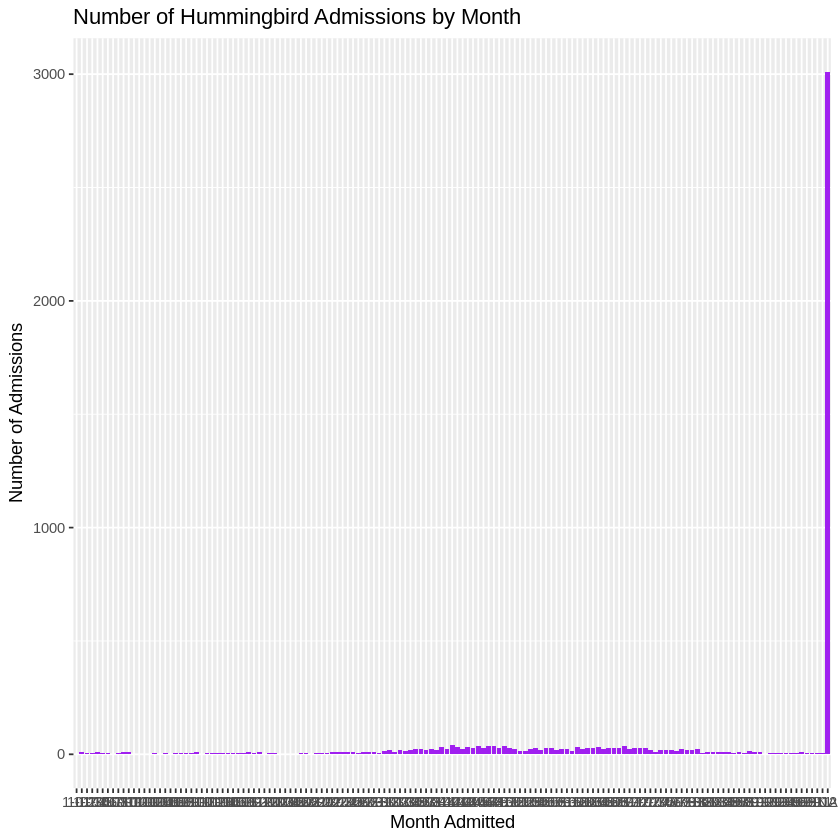

In [66]:
print (p_month)

In [67]:
## Plot similar timeline for Yearly admissions of Hummingbirds
# Plot admissions by year
p_year = ggplot(admissions_by_year, aes(x = Admitted_year, y = count)) +
  geom_bar(stat = "identity", fill = "purple") +
  xlab("Year Admitted") +
  ylab("Number of Admissions") +
  labs(title = "Number of Hummingbird Admissions by Year")

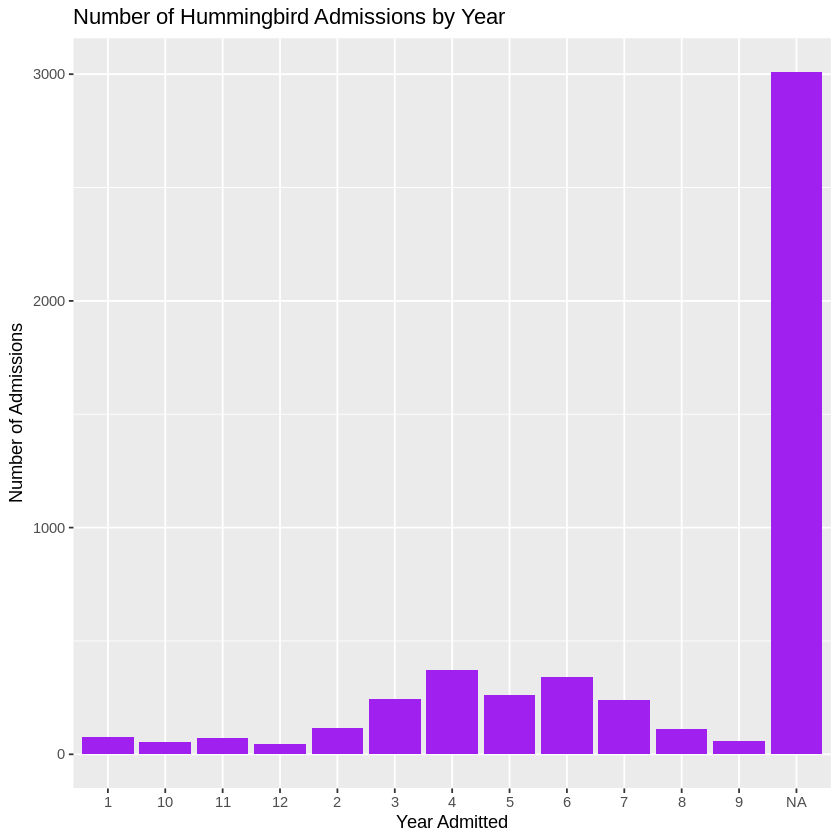

In [68]:
print (p_year)

In [130]:
library(tidyverse)
library(lubridate)

df <- df %>%
  mutate(
    Admitted = mdy(Admitted)     # <— CORRECT PARSER FOR m/d/yyyy
  )


In [131]:
head(df$Admitted)


[1] NA           NA           "2020-03-01" NA           "2020-04-09"
[6] NA

In [133]:
df %>%
  filter(is.na(Admitted)) %>%
  count(Green_Orange)


Green_Orange,n
<chr>,<int>
Non-selasphorus spp.,2514
Selasphorus spp.,495


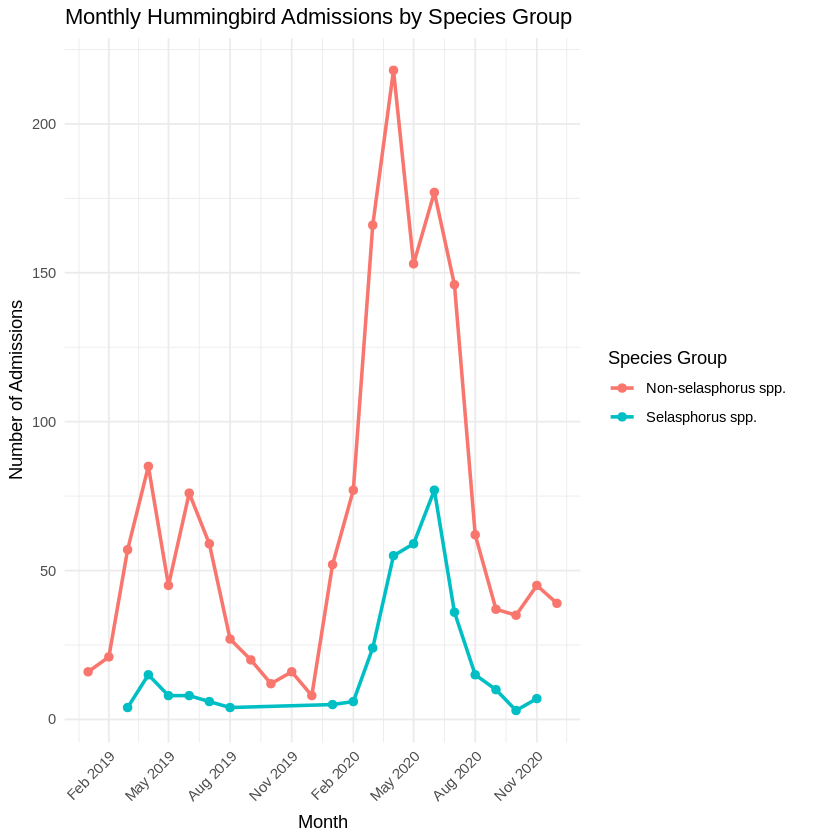

In [134]:
ggplot(admissions_by_month_species,
       aes(x = month, y = admissions, color = Green_Orange)) +
  geom_line(linewidth = 1) +
  geom_point(size = 2) +
  labs(
    title = "Monthly Hummingbird Admissions by Species Group",
    x = "Month",
    y = "Number of Admissions",
    color = "Species Group"
  ) +
  scale_x_date(date_labels = "%b %Y", date_breaks = "3 months") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))



In [135]:
library(tidyr)
admissions_by_month_species <- admissions_by_month_species %>%
  complete(month = seq(min(month), max(month), by = "month"),
           Green_Orange,
           fill = list(admissions = 0))


In [136]:
library(tidyverse)
library(lubridate)
library(tidyr)

admissions_by_month_species <- df %>%
  filter(!is.na(Admitted)) %>%        # remove rows with missing dates
  mutate(month = floor_date(Admitted, "month")) %>%
  count(month, Green_Orange, name = "admissions") %>%
  complete(
    month = seq(min(month), max(month), by = "month"),  # all months
    Green_Orange,                                       # all species groups
    fill = list(admissions = 0)                         # fill missing with 0
  )


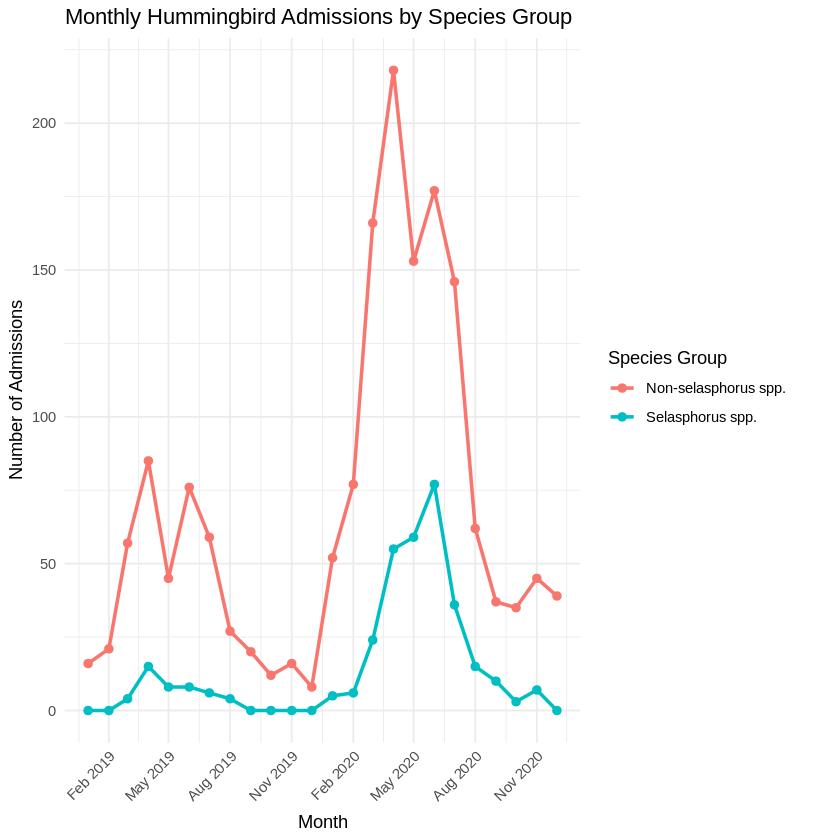

In [137]:
ggplot(admissions_by_month_species,
       aes(x = month, y = admissions, color = Green_Orange)) +
  geom_line(linewidth = 1) +
  geom_point(size = 2) +
  labs(
    title = "Monthly Hummingbird Admissions by Species Group",
    x = "Month",
    y = "Number of Admissions",
    color = "Species Group"
  ) +
  scale_x_date(date_labels = "%b %Y", date_breaks = "3 months") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
